In [1]:
import pandas as pd
import csv

# Load the large CSV file in chunks
large_file_path = '/content/all_data.csv'
output_subset_path = '/content/all_data_subset.csv'

# Set the number of rows to sample (e.g., 10,000)
sample_size = 10000

# Use pandas to sample and save the smaller dataset
# The 'error_bad_lines' argument has been replaced with 'on_bad_lines'.
# Setting 'on_bad_lines' to 'warn' will issue a warning for bad lines
# but will continue processing.
# **Change:** Added `engine='python'` to force using the Python parser
# **Change:** Added `quoting=csv.QUOTE_NONE` to handle unescaped quotes
# **Change:** Added `encoding='latin-1'` to handle potential encoding issues
chunk_iter = pd.read_csv(large_file_path, chunksize=100000, on_bad_lines='warn', engine='python', quoting=csv.QUOTE_NONE, escapechar='\\', encoding='latin-1')
sampled_data = pd.concat([chunk.sample(n=min(len(chunk), sample_size), random_state=42) for chunk in chunk_iter])

# Save the subset to a new file
sampled_data.to_csv(output_subset_path, index=False)
print(f"Subset saved to {output_subset_path}")

Streaming output truncated to the last 5000 lines.

  sampled_data = pd.concat([chunk.sample(n=min(len(chunk), sample_size), random_state=42) for chunk in chunk_iter])
<ipython-input-1-b740e8123a9b>:19: ParserWarning: Skipping line 293881: Expected 46 fields in line 293881, saw 48

  sampled_data = pd.concat([chunk.sample(n=min(len(chunk), sample_size), random_state=42) for chunk in chunk_iter])
<ipython-input-1-b740e8123a9b>:19: ParserWarning: Skipping line 293882: Expected 46 fields in line 293882, saw 47

  sampled_data = pd.concat([chunk.sample(n=min(len(chunk), sample_size), random_state=42) for chunk in chunk_iter])
<ipython-input-1-b740e8123a9b>:19: ParserWarning: Skipping line 293883: Expected 46 fields in line 293883, saw 48

  sampled_data = pd.concat([chunk.sample(n=min(len(chunk), sample_size), random_state=42) for chunk in chunk_iter])
<ipython-input-1-b740e8123a9b>:19: ParserWarning: Skipping line 293885: Expected 46 fields in line 293885, saw 47

  sampled_data = pd.conc

Subset saved to /content/all_data_subset.csv


In [2]:
import pandas as pd
import re

# Load the sampled subset
subset_file_path = '/content/all_data_subset.csv'
data = pd.read_csv(subset_file_path)
print(f"Loaded subset shape: {data.shape}")

Loaded subset shape: (64954, 46)


<ipython-input-2-deefa447f8ed>:6: DtypeWarning: Columns (17,18,19,20,21,22,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(subset_file_path)


In [10]:
# Clean Text Data
def clean_text(text):
    text = str(text).lower()  # Ensure text is lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # Remove URLs
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove special characters
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra whitespace
    return text

# Apply the clean_text function to create the 'cleaned_text' column
data['cleaned_text'] = data['comment_text'].apply(clean_text) # This line was moved outside the function definition.


In [11]:
# Create Binary Labels
# Convert 'toxicity' column to numeric, handling errors
data['toxicity'] = pd.to_numeric(data['toxicity'], errors='coerce')
data['label'] = (data['toxicity'] >= 0.5).astype(int)

In [12]:
# Save Processed Data
processed_file_path = '/content/processed_subset.csv'
data[['cleaned_text', 'label']].to_csv(processed_file_path, index=False)
print(f"Processed data saved to {processed_file_path}")

Processed data saved to /content/processed_subset.csv


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset
data = pd.read_csv("/content/processed_subset.csv")
data = data.dropna(subset=['cleaned_text', 'label'])  # Ensure no missing values

# Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(data['cleaned_text'], data['label'], test_size=0.2, random_state=42)


In [15]:
from sentence_transformers import SentenceTransformer

# Load a pre-trained SentenceTransformer model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')  # A lightweight and fast model

# Generate embeddings for the training and validation sets
train_embeddings = model.encode(X_train.tolist(), batch_size=32, show_progress_bar=True)
val_embeddings = model.encode(X_val.tolist(), batch_size=32, show_progress_bar=True)


/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1360 [00:00<?, ?it/s]

Batches:   0%|          | 0/340 [00:00<?, ?it/s]

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Train a Logistic Regression classifier
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(train_embeddings, y_train)

# Make predictions
val_preds = clf.predict(val_embeddings)

# Evaluate the model
print("Validation Classification Report:")
print(classification_report(y_val, val_preds))


Validation Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      9998
           1       0.69      0.35      0.47       879

    accuracy                           0.93     10877
   macro avg       0.82      0.67      0.72     10877
weighted avg       0.92      0.93      0.92     10877



In [17]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# Prepare TensorDataset
train_dataset = TensorDataset(torch.tensor(train_embeddings, dtype=torch.float32), torch.tensor(y_train.values, dtype=torch.long))
val_dataset = TensorDataset(torch.tensor(val_embeddings, dtype=torch.float32), torch.tensor(y_val.values, dtype=torch.long))

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(SimpleNN, self).__init__()
        self.fc = nn.Linear(input_dim, num_classes)

    def forward(self, x):
        return self.fc(x)

# Initialize the model, loss function, and optimizer
input_dim = train_embeddings.shape[1]
num_classes = len(data['label'].unique())
nn_model = SimpleNN(input_dim, num_classes).to('cuda')
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(nn_model.parameters(), lr=1e-3)

# Train the neural network
epochs = 10
for epoch in range(epochs):
    nn_model.train()
    total_loss = 0
    for batch in train_loader:
        inputs, labels = batch
        inputs, labels = inputs.to('cuda'), labels.to('cuda')

        optimizer.zero_grad()
        outputs = nn_model(inputs)
        loss = criterion(outputs, labels)
        total_loss += loss.item()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch + 1}, Loss: {total_loss / len(train_loader)}")

# Evaluate the neural network
nn_model.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for batch in val_loader:
        inputs, labels = batch
        inputs, labels = inputs.to('cuda'), labels.to('cuda')

        outputs = nn_model(inputs)
        preds = torch.argmax(outputs, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

print("Validation Classification Report:")
print(classification_report(all_labels, all_preds))


Epoch 1, Loss: 0.2700348568861099
Epoch 2, Loss: 0.1903916176627664
Epoch 3, Loss: 0.17435412581681328
Epoch 4, Loss: 0.16711024343008724
Epoch 5, Loss: 0.162965691623771
Epoch 6, Loss: 0.1603044183609788
Epoch 7, Loss: 0.15839451300802038
Epoch 8, Loss: 0.15716038107433739
Epoch 9, Loss: 0.15607198796865038
Epoch 10, Loss: 0.15524495376191813
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      9998
           1       0.68      0.34      0.46       879

    accuracy                           0.93     10877
   macro avg       0.81      0.66      0.71     10877
weighted avg       0.92      0.93      0.92     10877



In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sentence_transformers import SentenceTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset



# Load dataset
data = pd.read_csv("/content/processed_subset.csv")
data = data.dropna(subset=['cleaned_text', 'label'])  # Ensure no missing values

# Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(data['cleaned_text'], data['label'], test_size=0.2, random_state=42)

# Load a pre-trained SentenceTransformer model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')  # A lightweight and fast model

# Generate embeddings for the training and validation sets
train_embeddings = model.encode(X_train.tolist(), batch_size=32, show_progress_bar=True)
val_embeddings = model.encode(X_val.tolist(), batch_size=32, show_progress_bar=True)

# Train a Logistic Regression classifier
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(train_embeddings, y_train)

# Make predictions and get predicted probabilities
val_preds = clf.predict(val_embeddings)
# Get predicted probabilities for ROC curve
val_preds_proba = clf.predict_proba(val_embeddings) # this line added


# Evaluate the model
print("Validation Classification Report:")
print(classification_report(y_val, val_preds))


Batches:   0%|          | 0/1360 [00:00<?, ?it/s]

Batches:   0%|          | 0/340 [00:00<?, ?it/s]

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      9998
           1       0.69      0.35      0.47       879

    accuracy                           0.93     10877
   macro avg       0.82      0.67      0.72     10877
weighted avg       0.92      0.93      0.92     10877



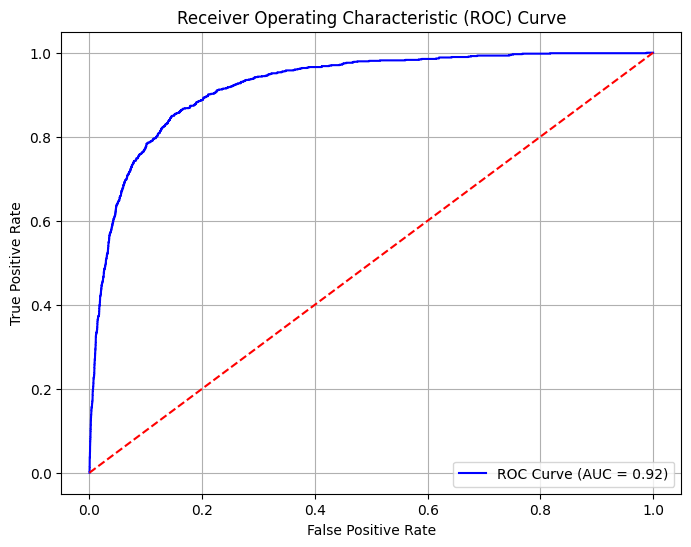

In [20]:
fpr, tpr, thresholds = roc_curve(y_val, val_preds_proba[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

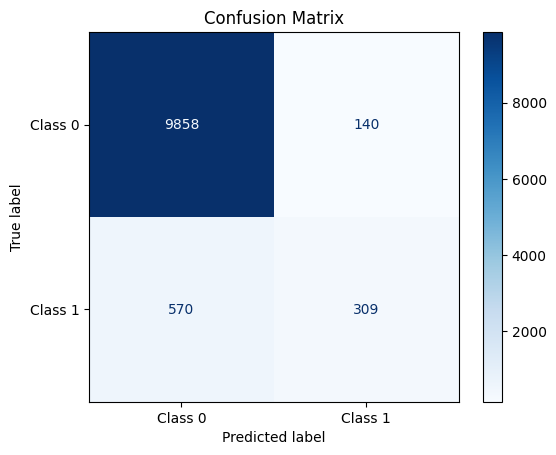

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute Confusion Matrix
cm = confusion_matrix(y_val, val_preds)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [26]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# ... (Your existing data loading and model definition code) ...

# Train the neural network
epochs = 10
training_losses = []  # Initialize an empty list to store training losses
validation_losses = [] # Initialize an empty list to store validation losses

for epoch in range(epochs):
    nn_model.train()
    total_loss = 0
    for batch in train_loader:
        inputs, labels = batch
        inputs, labels = inputs.to('cuda'), labels.to('cuda')

        optimizer.zero_grad()
        outputs = nn_model(inputs)
        loss = criterion(outputs, labels)
        total_loss += loss.item()
        loss.backward()
        optimizer.step()


    avg_train_loss = total_loss / len(train_loader)  # Calculate average training loss for the epoch
    training_losses.append(avg_train_loss)  # Append the loss to the list
    print(f"Epoch {epoch + 1}, Loss: {avg_train_loss}")

    # Validation loop to calculate validation loss (Add this section)
    nn_model.eval()
    val_loss = 0
    with torch.no_grad():
        for batch in val_loader:
            inputs, labels = batch
            inputs, labels = inputs.to('cuda'), labels.to('cuda')

            outputs = nn_model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    avg_val_loss = val_loss / len(val_loader)
    validation_losses.append(avg_val_loss)
    print(f"Epoch {epoch + 1}, Validation Loss: {avg_val_loss}")


Epoch 1, Loss: 0.15451048513299184
Epoch 1, Validation Loss: 0.16688705966533984
Epoch 2, Loss: 0.15389690055128405
Epoch 2, Validation Loss: 0.16657371148467065
Epoch 3, Loss: 0.15344148792792112
Epoch 3, Validation Loss: 0.16640993028002626
Epoch 4, Loss: 0.15309590589090744
Epoch 4, Validation Loss: 0.16674276865361368
Epoch 5, Loss: 0.15263150019625968
Epoch 5, Validation Loss: 0.16652065893525586
Epoch 6, Loss: 0.15231035566094386
Epoch 6, Validation Loss: 0.16632769430494485
Epoch 7, Loss: 0.1520450852701769
Epoch 7, Validation Loss: 0.16662549202823462
Epoch 8, Loss: 0.1518257770468207
Epoch 8, Validation Loss: 0.16630104538053275
Epoch 9, Loss: 0.15155752937665537
Epoch 9, Validation Loss: 0.16629054063711973
Epoch 10, Loss: 0.15134080399156494
Epoch 10, Validation Loss: 0.16620009434135521


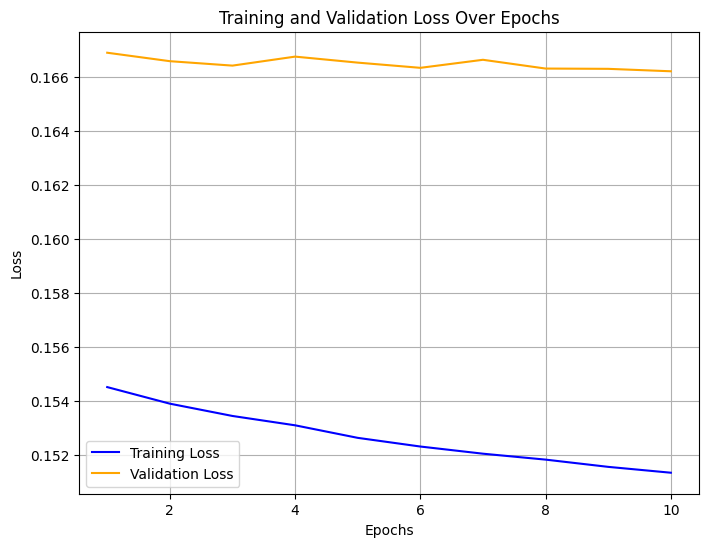

In [27]:
 #Assuming training_losses and validation_losses are lists containing loss values
epochs = range(1, len(training_losses) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, training_losses, label='Training Loss', color='blue')
plt.plot(epochs, validation_losses, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid()
plt.show()